# AI/ML Job Salary Prediction

## Problem Statement
Predict salary ranges for AI/ML roles based on experience, job title, company size, and location. This project is designed to be beginner-friendly while covering key Machine Learning concepts.

## Dataset
We are using the `ds_salaries.csv` dataset, which contains information about data science job salaries.

## Workflow
1. **Exploratory Data Analysis (EDA)**: Understand the data structure and distributions.
2. **Preprocessing**: Clean the data and convert categorical variables into numbers.
3. **Model Building**: Train Linear Regression, Decision Tree, and Random Forest models.
4. **Evaluation**: Compare models using Mean Absolute Error (MAE) and R2 Score.

In [31]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Setting plot style
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading and Overview
Let's load the dataset and take a look at the first few rows.

In [32]:
# Load the dataset
df = pd.read_csv('../data/ds_salaries.csv')

# Display first 5 rows
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [33]:
# Check dataset info (columns, data types, missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [34]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [35]:
# Drop Unnamed column if it exists (it often comes from CSV index)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("Dropped 'Unnamed: 0' column")

Dropped 'Unnamed: 0' column


In [36]:
# Drop duplicates if any
df = df.drop_duplicates()

## 2. Exploratory Data Analysis (EDA)
We will visualize the data to find patterns.

### Salary Distribution
Since we generally want to predict salary in a standard currency, we will use `salary_in_usd`.

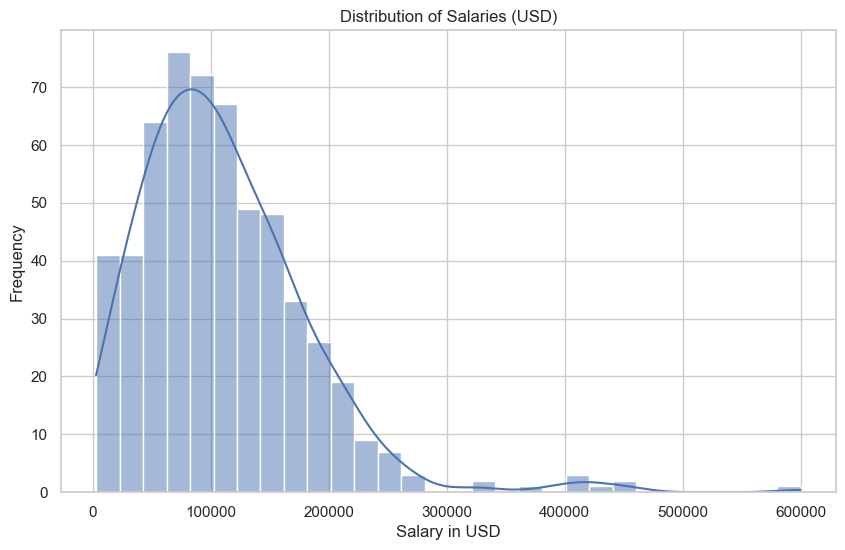

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

### Experience Level Count
- **EN**: Entry-level
- **MI**: Mid-level
- **SE**: Senior-level
- **EX**: Executive-level

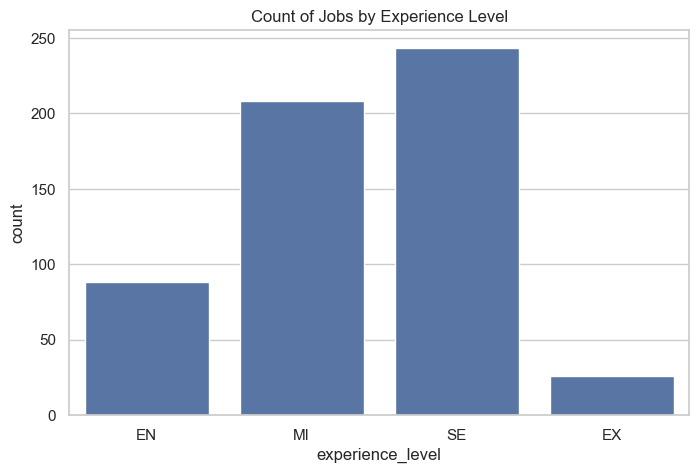

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='experience_level', data=df, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Count of Jobs by Experience Level')
plt.show()

### Salary vs Experience Level
Does higher experience lead to higher salary? Let's check.

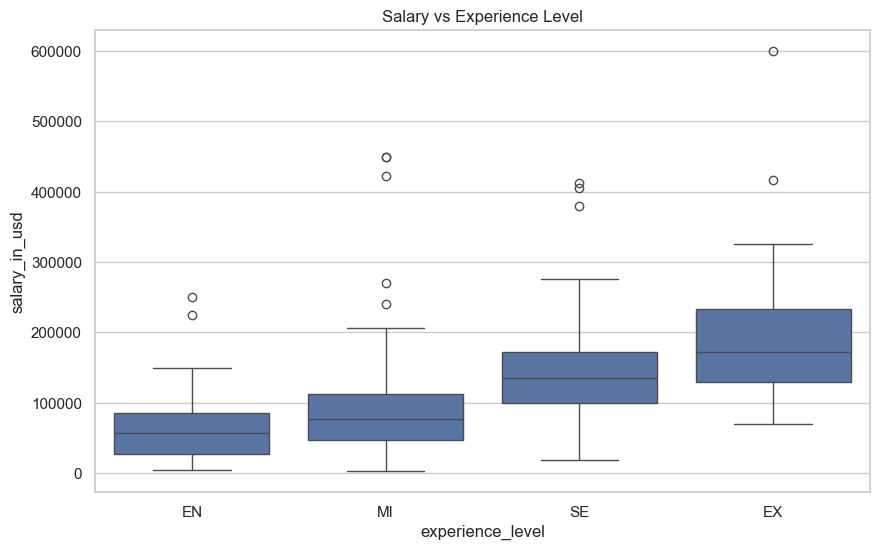

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Salary vs Experience Level')
plt.show()

## 3. Data Preprocessing
Machine Learning models generally require numerical input. We need to handle categorical data.

In [40]:
# Drop redundant columns
# 'salary' and 'salary_currency' are redundant because we have 'salary_in_usd'
df_clean = df.drop(columns=['salary', 'salary_currency'])
df_clean.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### Ordinal Encoding
Variables like `experience_level` and `company_size` have a clear order.
- Experience: EN < MI < SE < EX
- Company Size: S < M < L

In [41]:
# Mapping for Experience Level
exp_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df_clean['experience_level_encoded'] = df_clean['experience_level'].map(exp_mapping)

# Mapping for Company Size
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df_clean['company_size_encoded'] = df_clean['company_size'].map(size_mapping)

# Check if mapping worked
df_clean[['experience_level', 'experience_level_encoded', 'company_size', 'company_size_encoded']].head()

,experience_level,experience_level_encoded,company_size,company_size_encoded
0,MI,2,L,3
1,SE,3,S,1
2,SE,3,M,2
3,MI,2,S,1
4,SE,3,L,3


### One-Hot Encoding
For nominal variables (no order) like `employment_type`, `job_title`, `company_location`, we use One-Hot Encoding.
Note: `job_title` has many unique values, which might create too many columns. For simplicity in this beginner project, we will keep it, but in advanced projects, we might group them.

In [42]:
# Select columns to encode
categorical_cols = ['employment_type', 'job_title', 'employee_residence', 'company_location']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Drop original categorical columns that we manually encoded earlier
df_encoded = df_encoded.drop(columns=['experience_level', 'company_size'])

print("Shape after encoding:", df_encoded.shape)
df_encoded.head()

Shape after encoding: (565, 162)


,work_year,salary_in_usd,remote_ratio,experience_level_encoded,company_size_encoded,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2020,79833,0,2,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2020,260000,0,3,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020,109024,50,3,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020,20000,0,2,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2020,150000,50,3,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Correlation Matrix
Let's see what correlates most with Salary.

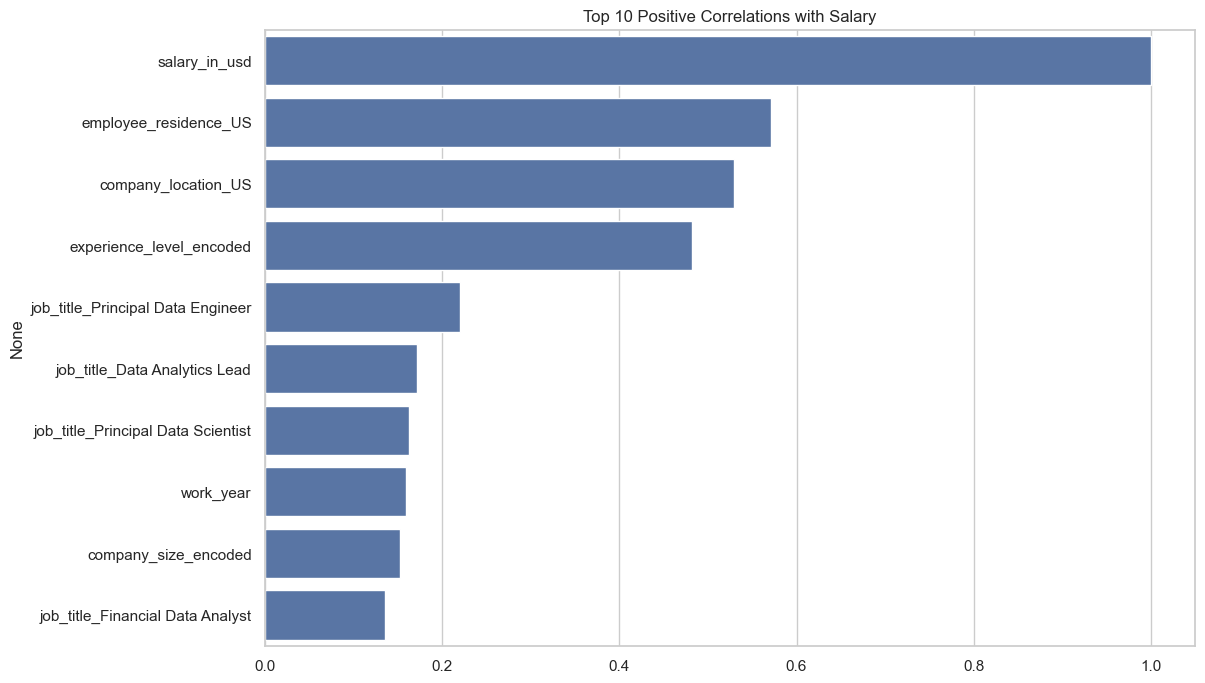

In [43]:
plt.figure(figsize=(12, 8))
# We filter for top correlations for readability
correlation = df_encoded.corr()['salary_in_usd'].sort_values(ascending=False).head(10)
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Top 10 Positive Correlations with Salary')
plt.show()

## 4. Model Development
We will try three models:
1. **Linear Regression**: A simple baseline.
2. **Decision Tree Regressor**: Capable of capturing non-linear relationships.
3. **Random Forest Regressor**: An ensemble of trees, usually more accurate.

In [44]:
# Define Features (X) and Target (y)
X = df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd']

# Split into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (452, 161)
Test set shape: (113, 161)


### Model 1: Linear Regression

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: ${mae_lr:,.2f}")
print(f"Linear Regression R2 Score: {r2_lr:.4f}")

Linear Regression MAE: $34,414.46
Linear Regression R2 Score: 0.3096


### Model 2: Decision Tree Regressor

In [46]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MAE: ${mae_dt:,.2f}")
print(f"Decision Tree R2 Score: {r2_dt:.4f}")

Decision Tree MAE: $33,459.95
Decision Tree R2 Score: 0.3815


### Model 3: Random Forest Regressor

In [47]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: ${mae_rf:,.2f}")
print(f"Random Forest R2 Score: {r2_rf:.4f}")

Random Forest MAE: $29,534.91
Random Forest R2 Score: 0.4339


## 5. Evaluation and Conclusion

In [48]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'R2 Score': [r2_lr, r2_dt, r2_rf]
})

results.sort_values(by='R2 Score', ascending=False)

,Model,MAE,R2 Score
2,Random Forest,29534.906964,0.433856
1,Decision Tree,33459.945888,0.381453
0,Linear Regression,34414.460152,0.309631


In [49]:
import joblib
import os

# Create resources directory if it doesn't exist
os.makedirs('../resources', exist_ok=True)

# Save the Random Forest model (Best Fit)
joblib.dump(rf_model, '../resources/best_model.pkl')
print("Model saved to ../resources/best_model.pkl")

Model saved to ../resources/best_model.pkl


### Conclusion
- **Random Forest** typically performs best because it averages multiple decision trees, reducing overfitting.
- **Linear Regression** might struggle if the relationship between features and salary isn't strictly linear.
- **Decision Tree** can be prone to overfitting, capturing noise in the training data.

This project demonstrated how to preprocess real-world data, handle categorical variables, and train multiple regression models to predict salaries.